In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
def determine_quadrant(row, x_center, y_center):
        if row['x'] >= x_center and row['y'] >= y_center:
            return 'Q1'  
        elif row['x'] < x_center and row['y'] >= y_center:
            return 'Q2'  
        elif row['x'] < x_center and row['y'] < y_center:
            return 'Q3' 
        else:
            return 'Q4' 
            
def show_quadrant(df, _type):
    df = df.rename(columns={'gov_attention': 'x', 'pub_attention': 'y'})
    
    x_center = df['x'].mean()
    y_center = df['y'].mean()

    print(x_center)
    print(y_center)
    
    df['Quadrant'] = df.apply(determine_quadrant, axis=1, args=(x_center, y_center))
    
    plt.figure(figsize=(4, 4))
    colors = {'Q1': '#CB1D26', 'Q2': '#FD931C', 'Q3': '#3DA7F9', 'Q4': '#79C744'}
    
    for quadrant, color in colors.items():
        subset = df[df['Quadrant'] == quadrant]
        plt.scatter(
            subset['x'], 
            subset['y'], 
            label=quadrant, 
            c=color, 
            s=30,  
            alpha=0.8,
            edgecolor='black'
        )
    
    
    plt.axhline(y_center, color='black', linestyle='--', linewidth=0.5) 
    plt.axvline(x_center, color='black', linestyle='--', linewidth=0.5) 
    plt.legend()
    plt.grid(color='#dddddd', linestyle='-', linewidth=0.5, alpha=0.7) 
    plt.xlabel('Government Attention')
    plt.ylabel('Public Attention x 1000')

    ax = plt.gca()  
    frame_color = '#ddd'
    ax.spines['top'].set_color(frame_color)  
    ax.spines['right'].set_color(frame_color) 
    ax.spines['left'].set_color(frame_color) 
    ax.spines['bottom'].set_color(frame_color) 

    
    # ax.tick_params(axis='x', colors='blue') 
    # ax.tick_params(axis='y', colors='blue') 

    plt.savefig('./R/quadrant_' + _type + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

    tt = df.rename(columns={'x': 'gov_attention', 'y': 'pub_attention'})
    tt.to_csv('./R/quadrant_' + _type + '_Q.csv', index=None)
    tt.to_csv('./QGIS/quadrant_' + _type + '_Q.csv', index=None)

## City

In [207]:
city_pub_att = pd.read_csv('./QGIS/nationwide_total_count.csv')
city_pub_att = city_pub_att.rename(columns={'count': 'pub_attention'})
city_pub_att['pub_attention'] = city_pub_att['pub_attention'] / 1000

city_gov_att = pd.read_csv('./QGIS/city_gov_attention.csv')[['city_name', 'en_name', 'gov_attention']]
city_gov_att = city_gov_att.rename(columns={'city_name': 'city'})

city_att = pd.merge(city_gov_att, city_pub_att, on='city')
city_att.to_csv('./R/quadrant_city.csv', index=None)
city_att

,city,en_name,gov_attention,pub_attention
0,盐城市,Yancheng,136.969001,76.271
1,日照市,Rizhao,135.257130,41.643
2,宜宾市,Yibin,109.002118,43.037
3,枣庄市,Zaozhuang,101.668439,39.976
4,东营市,Dongying,93.204906,47.382
...,...,...,...,...
263,临夏回族自治州,Linxia Hui Autonomous Prefecture,5.580846,6.221
264,莆田市,Putian,5.453565,26.961
265,吴忠市,Wuzhong,4.162427,11.327
266,崇左市,Chongzuo,3.823553,23.693


28.52210382788587
62.2666604477612


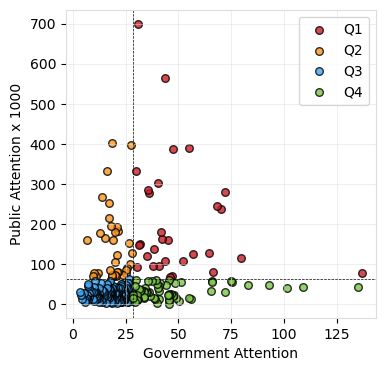

In [208]:
show_quadrant(city_att, 'city')

## Province

In [209]:
province_gov_att = pd.read_csv('./R/province_gov_attention.csv')
province_gov_att = province_gov_att.rename(columns={'avg_gov_att': 'gov_attention', 'pro_name': 'province'})

province_pub_att = pd.read_csv('./QGIS/nationwide_province.csv')
province_pub_att = province_pub_att.rename(columns={'count': 'pub_attention'})
province_pub_att['pub_attention'] = province_pub_att['pub_attention'] / 1000

province_att = pd.merge(province_pub_att, province_gov_att, on='province')
province_att.to_csv('./R/quadrant_province.csv', index=None)
province_att

,province,pro_en_name,pro_en_short,pub_attention,gov_attention
0,广东省,Guangdong,GD,1761.340,24.319176
1,江苏省,Jiangsu,JS,1549.152,41.080558
2,山东省,Shandong,SD,1385.688,69.740768
3,浙江省,Zhejiang,ZJ,1202.686,28.743197
4,河南省,Henan,HA,895.236,21.193208
5,河北省,Hebei,HE,835.684,29.356331
6,四川省,Sichuan,SC,829.390,36.754821
7,北京市,Beijing,BJ,699.761,30.847469
8,湖北省,Hubei,HB,689.344,25.417867
9,福建省,Fujian,FJ,656.544,19.424241


28.57695106195033
559.94553125


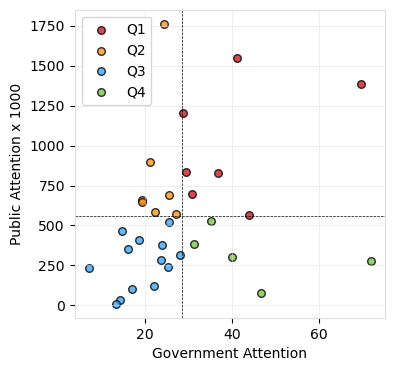

In [210]:
show_quadrant(province_att, 'province')

## Q1-Q4

In [211]:
from collections import Counter
def show_Q_dist(df):
    quadrant_counts = Counter(df['Quadrant'].tolist())
    quadrant_order = ['Q1', 'Q2', 'Q3', 'Q4']
    for quadrant in quadrant_order:
        count = quadrant_counts.get(quadrant, 0)  
        print(f"Quadrant: {quadrant}, Count: {count}")

In [212]:
Q_city = pd.read_csv('./R/quadrant_city_Q.csv')
show_Q_dist(Q_city)

Quadrant: Q1, Count: 30
Quadrant: Q2, Count: 34
Quadrant: Q3, Count: 143
Quadrant: Q4, Count: 61


In [213]:
Q_province = pd.read_csv('./R/quadrant_province_Q.csv')
show_Q_dist(Q_province)

Quadrant: Q1, Count: 7
Quadrant: Q2, Count: 7
Quadrant: Q3, Count: 13
Quadrant: Q4, Count: 5
